### 0.1 FUNDAMENTALS

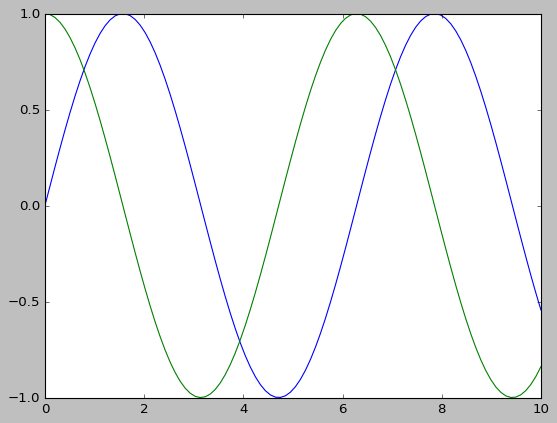

Using matplotlib backend: Qt5Agg


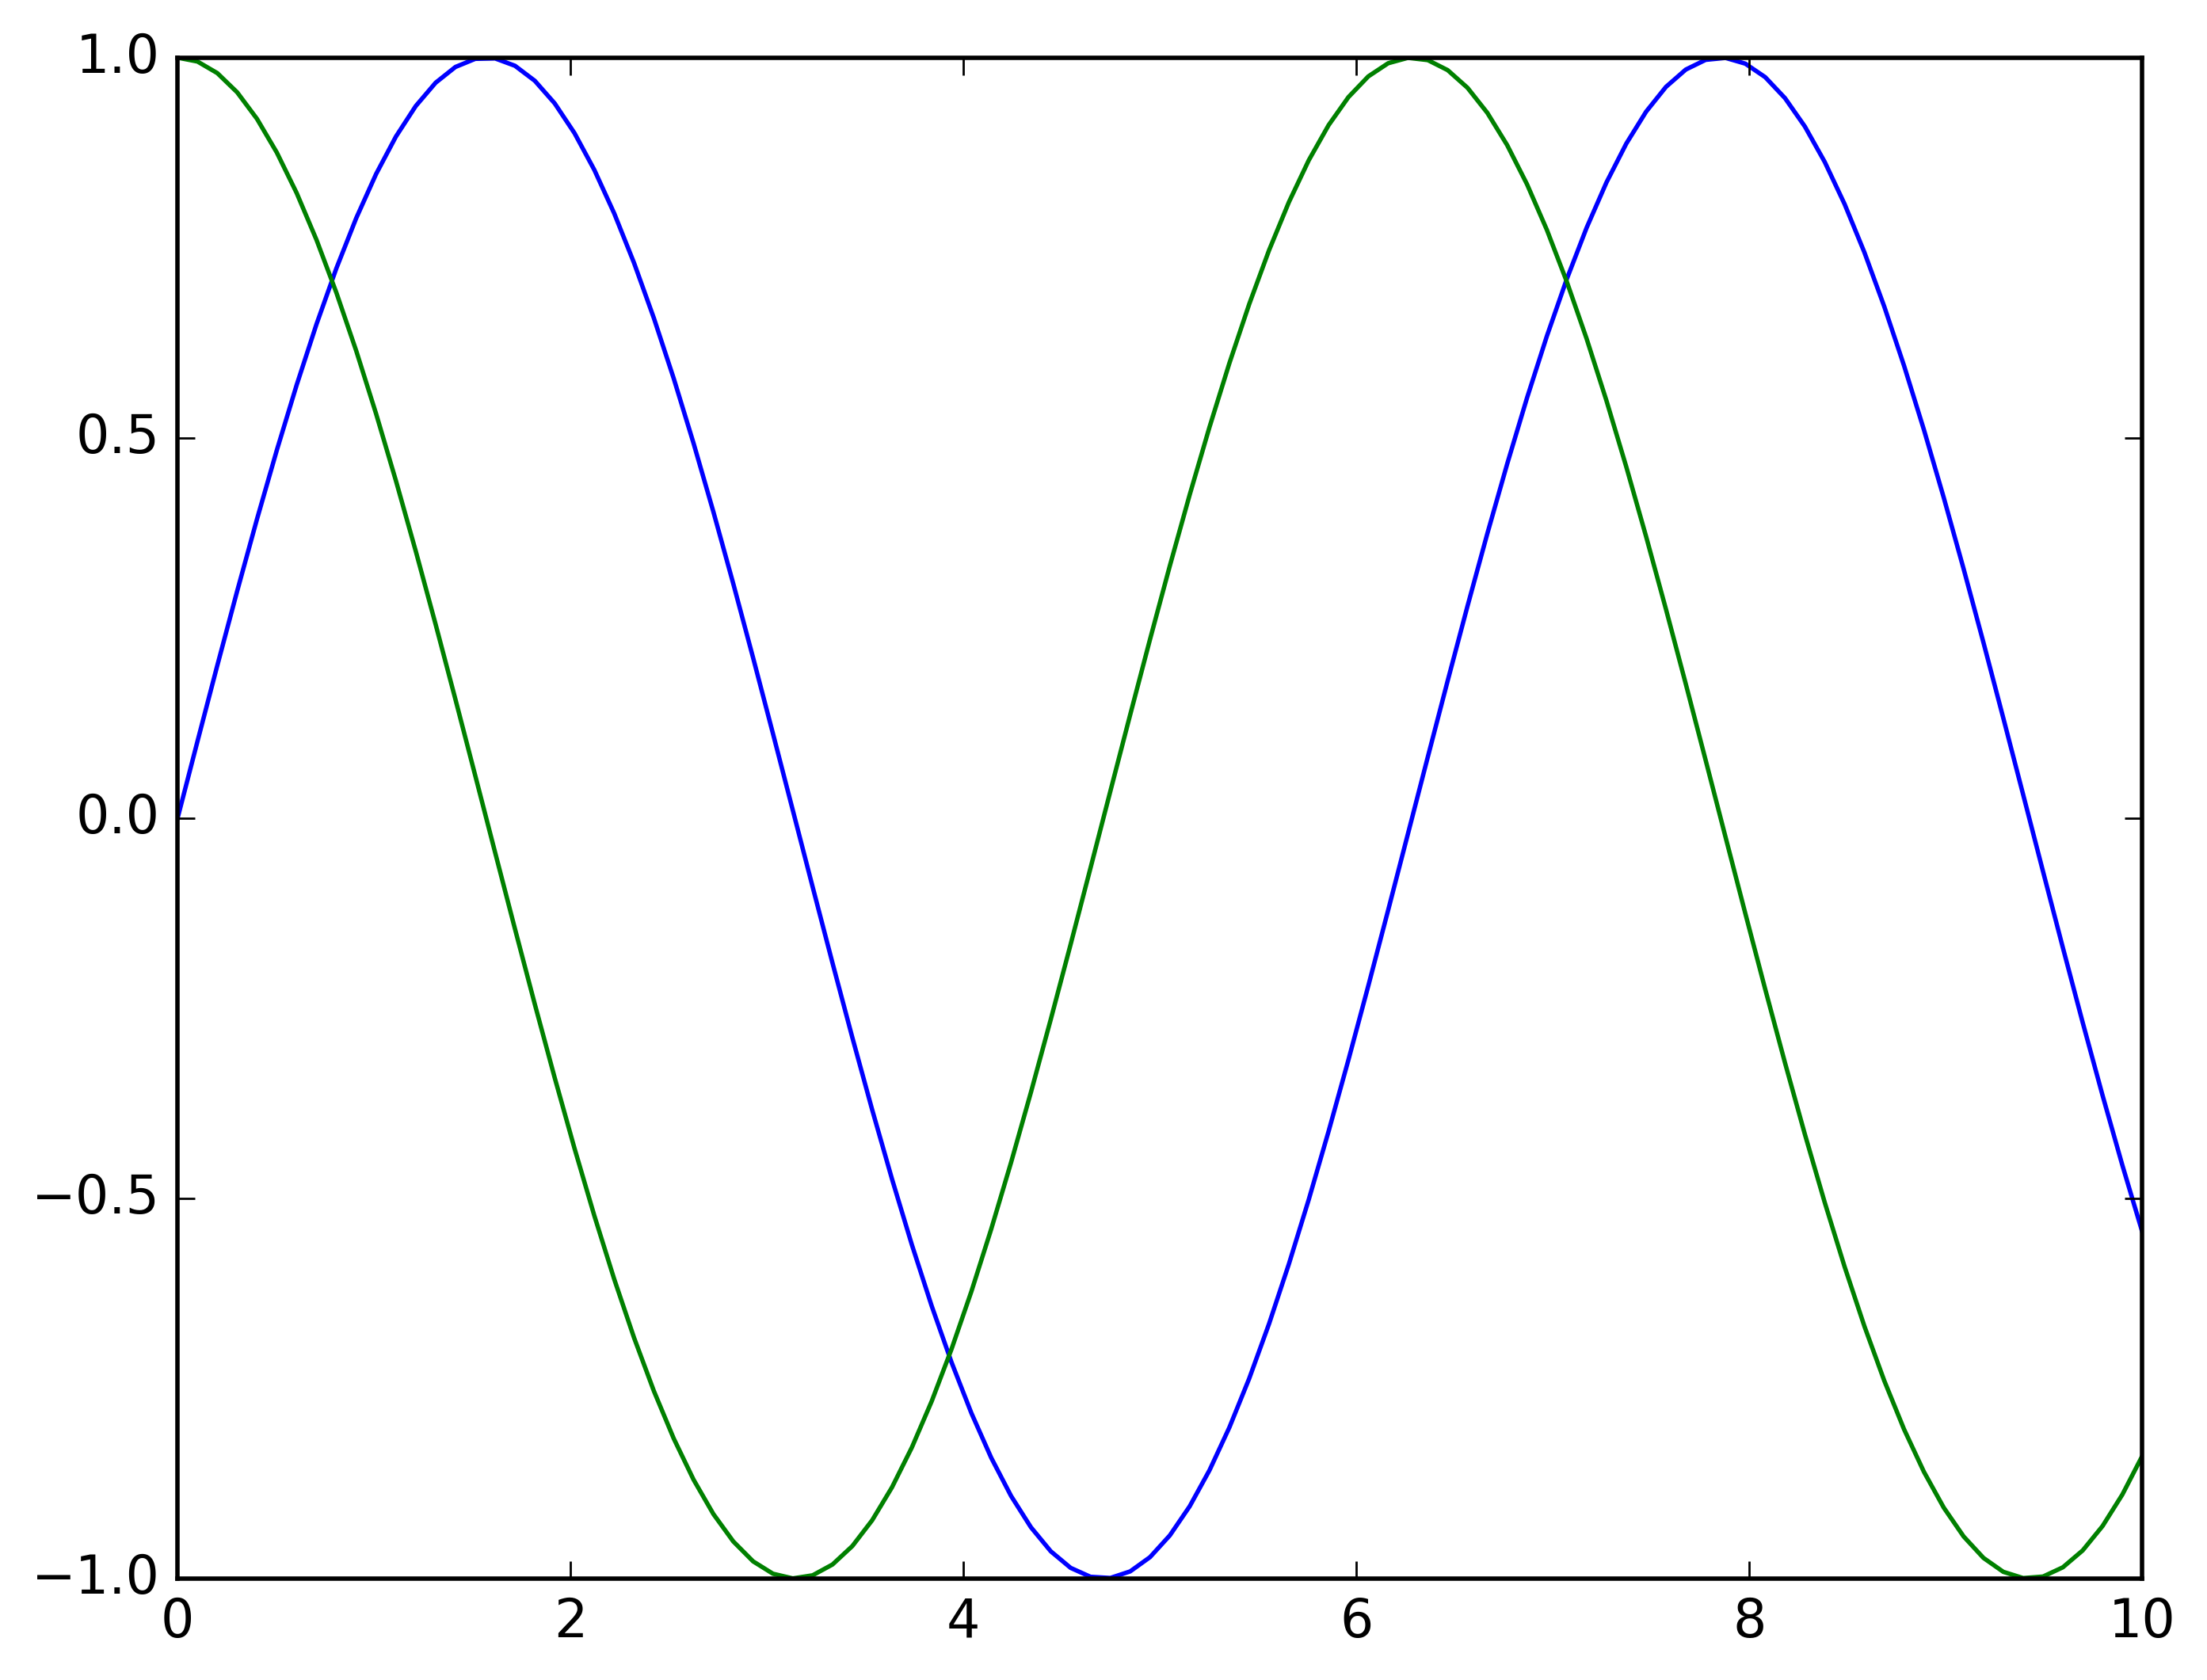

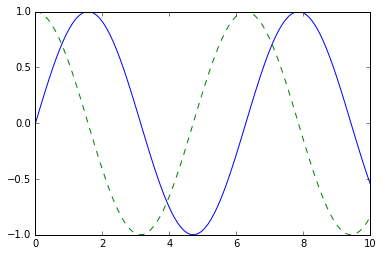

In [3]:
#@formatter:off
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from IPython.display import Image

plt.style.use('classic')

x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
fig = plt.gcf()

#1. scenario ploting
plt.show()
#2. using IPython
%matplotlib
plt.draw()  #refresh outlining
#3. using notebook
%matplotlib inline
#4. interative view
#matplotlib notebook
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')


fig.savefig('data/figure0.png', dpi=400, bbox_inches='tight')
Image('data/figure0.png')
#@formatter:on

### 0.2 INERFACES

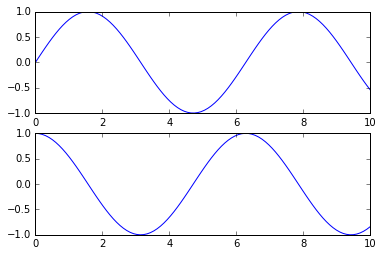

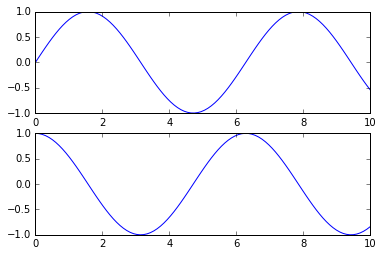

In [4]:
#MATLAB-like: saves last state, refers to its
plt.figure()  # Creates container

# set plot area and current axis
plt.subplot(2, 1, 1)  # (rows, columns, panel number)
plt.plot(x, np.sin(x))
# draw multiple plots at the same figure
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

plt.gcf()  #get current figure
plt.gca()  #get current axes

#OOP: allows you to refer to any object
# set grid of plots
# ax == array of two axes
fig, ax = plt.subplots(2)
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

### 1 CONFIGURATION

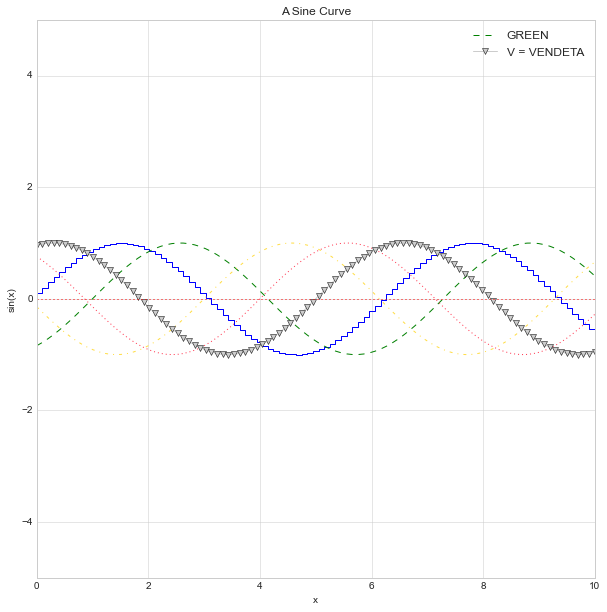

In [5]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(10, 10))

plt.plot(x, np.sin(x - 0), color='blue', linestyle='solid', drawstyle='steps')  # -
plt.plot(x, np.sin(x - 1), color='g', linestyle='dashed', label='GREEN')  # --
plt.plot(x, np.sin(x - 3), color='#FFDD44', linestyle='dashdot')  # -.
plt.plot(x, np.sin(x - 4), color=(1.0, 0.2, 0.3), linestyle='dotted')  # :
plt.plot(x, np.sin(x - 5), marker='v', color='0.8', linestyle='-', label='V = VENDETA')  # :
plt.plot(x, np.full_like(x, 0), ':r')  #short cut

plt.xlim(-1, 11)
plt.ylim(1.5, -1.5)  #reversed
plt.axis([-1, 11, -1.5, 1.5])
plt.axis('tight')
plt.axis('equal')

plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()

Text(0.5, 1.0, 'Nice')

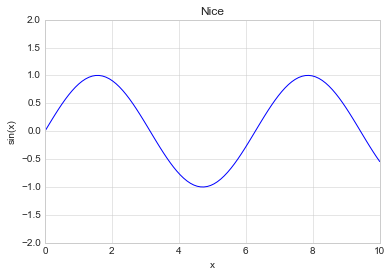

In [6]:
ax = plt.axes()
ax.plot(x, np.sin(x))
props = dict(
    xlim=(0, 10), ylim=(-2, 2),
    xlabel='x', ylabel='sin(x)',
    title='A Simple Peot'
)
ax.set(**props)
ax.set_title('Nice')  #or

### 2 SCATTER

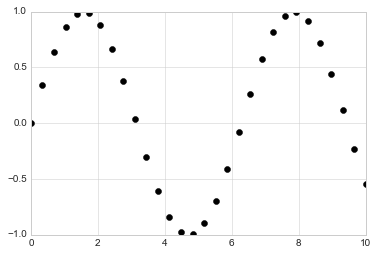

In [7]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black')

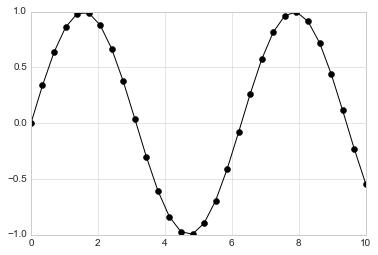

In [8]:
plt.axes().plot(x, y, '-ok')

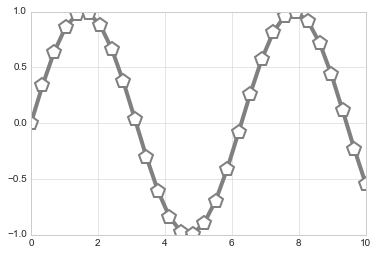

In [9]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)

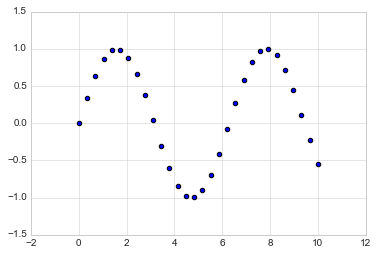

In [10]:
# less effective
plt.scatter(x, y, marker='o')  #the same as #2..0

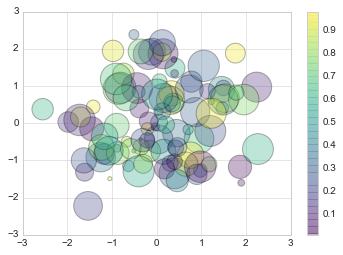

In [11]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar()

### 3 ERROR

<ErrorbarContainer object of 3 artists>

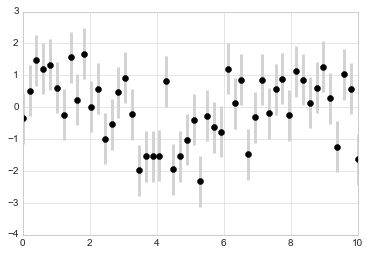

In [12]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)

### 4 CONTOUR

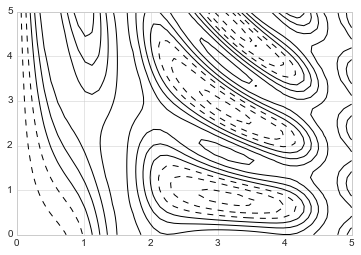

In [13]:
f = lambda x, y: np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, colors='black')

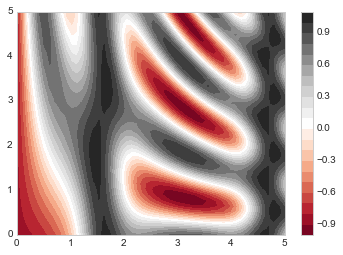

In [14]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

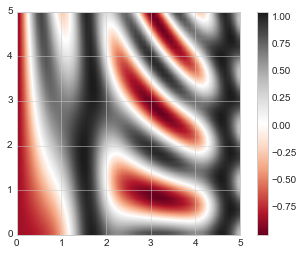

In [15]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy')
plt.colorbar()

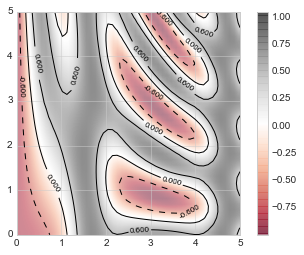

In [16]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', alpha=0.5)
plt.colorbar()

### 5 HISTOGRAM

(array([ 1.,  0.,  0.,  2.,  4.,  7.,  7., 18., 18., 34., 36., 45., 66.,
        70., 72., 91., 97., 74., 78., 74., 49., 40., 42., 23., 17., 17.,
        10.,  3.,  2.,  3.]),
 array([-3.58342162, -3.36610944, -3.14879726, -2.93148508, -2.71417289,
        -2.49686071, -2.27954853, -2.06223635, -1.84492417, -1.62761198,
        -1.4102998 , -1.19298762, -0.97567544, -0.75836325, -0.54105107,
        -0.32373889, -0.10642671,  0.11088548,  0.32819766,  0.54550984,
         0.76282202,  0.98013421,  1.19744639,  1.41475857,  1.63207075,
         1.84938294,  2.06669512,  2.2840073 ,  2.50131948,  2.71863167,
         2.93594385]),
 [<matplotlib.patches.Polygon at 0x1a3a3c5a1f0>])

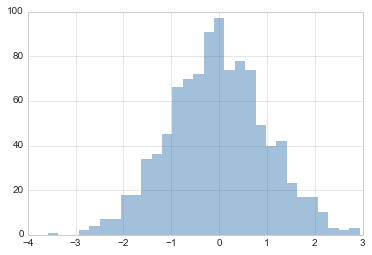

In [17]:
data = np.random.randn(1000)
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue', edgecolor='none')

[ 14 158 470 306  52]
[-3.58342162 -2.27954853 -0.97567544  0.32819766  1.63207075  2.93594385]


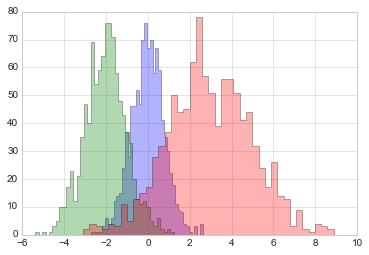

In [18]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

counts, bin_edges = np.histogram(data, bins=5)
print(counts)
print(bin_edges)

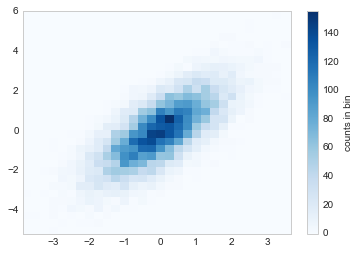

In [19]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

counts, xedges, yedges = np.histogram2d(x, y, bins=30)

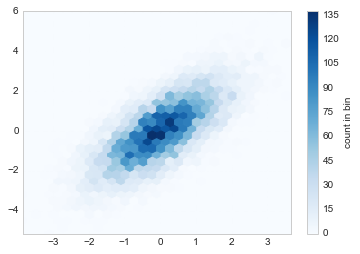

In [20]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

### 6 LEGEND

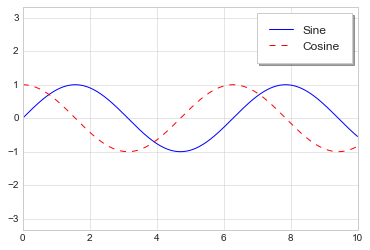

In [21]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
lines = []

lines += ax.plot(x, np.sin(x), '-b', label='Sine')
lines += ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
ax.legend(loc='best', frameon=True, shadow=True, borderpad=1)

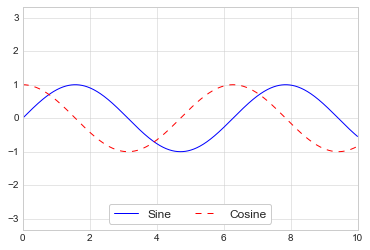

In [22]:
ax.legend(frameon=True, loc='lower center', ncol=2, fancybox=True, framealpha=1)
fig

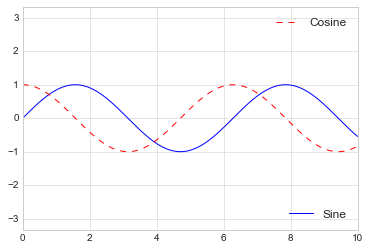

In [23]:
ax.legend(handles=lines[1:2], loc='upper right', labels=['Cosine'])
leg = mpl.legend.Legend(parent=ax, handles=lines[0:1], labels=['Sine'], loc='lower right')
ax.add_artist(leg)
fig

### 7 COLORBARS

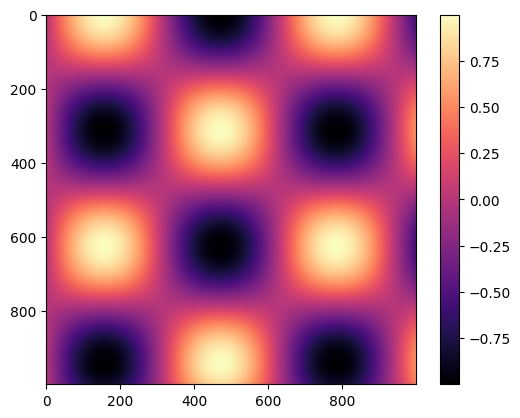

In [24]:
plt.style.use('default')
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I, cmap=mpl.cm.magma)
plt.colorbar()  #instance of plt.Axes

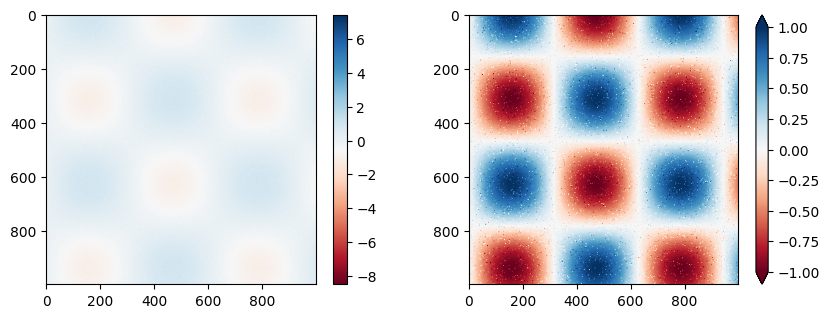

In [25]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 2, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))  #sets image size

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1)  #scales colorbar

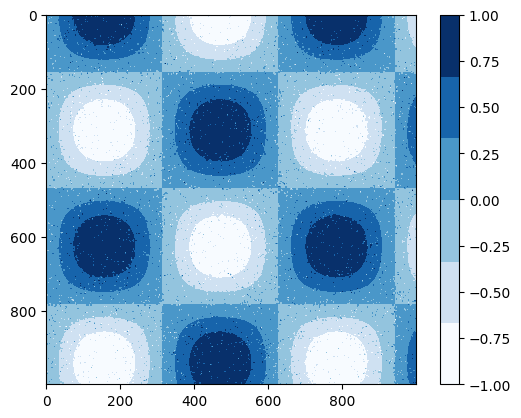

In [26]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1)

### 8 SUBPLOTS

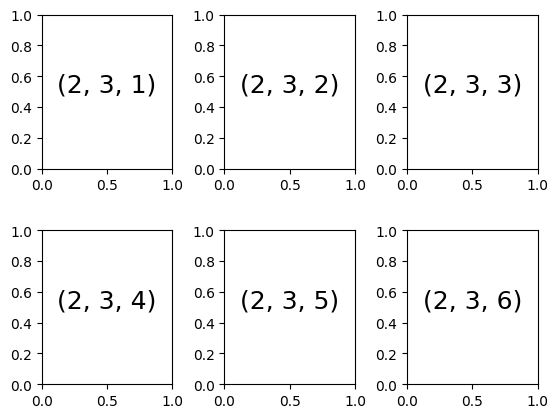

In [27]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

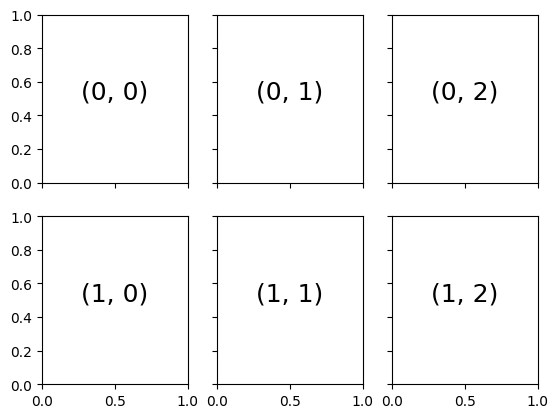

In [28]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
#or
# pd.DataFrame.plot(ax=ax[i, j])

<AxesSubplot:>

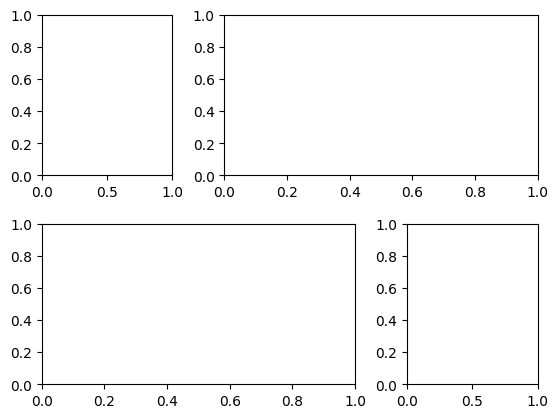

In [29]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

In [30]:
###  MD

### 9 TEXT & LABELS & TICKS

Text(2, -6, 'local minimum')

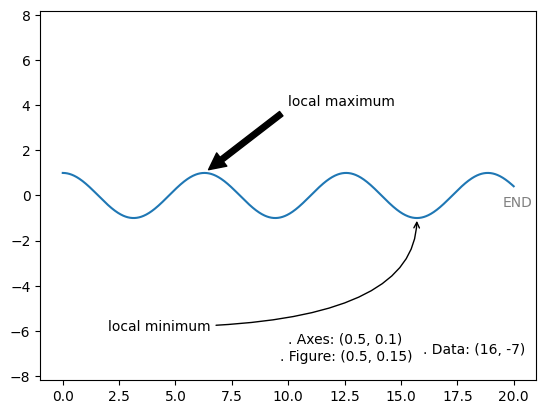

In [31]:
fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.text(19.5, -0.5, "END", size=10, color='gray')

ax.text(16, -7, ". Data: (16, -7)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.5, 0.15, ". Figure: (0.5, 0.15)", transform=fig.transFigure)

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))


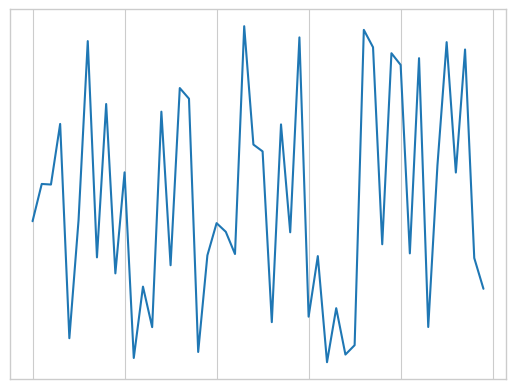

In [32]:
plt.style.use('seaborn-whitegrid')
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

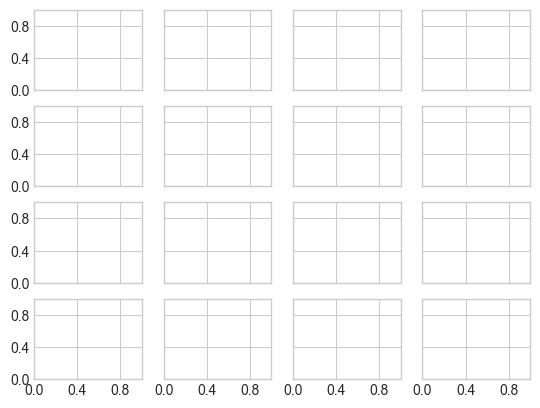

In [33]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))

[Text(0, -2, 'mTwo'), Text(0, 0, 'Zero'), Text(0, 2, 'Two')]

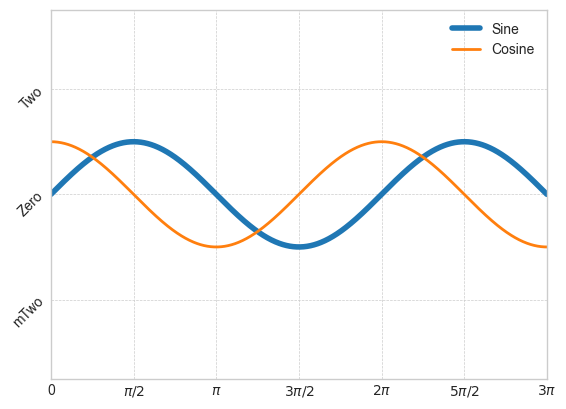

In [34]:
def format_func(value, tick_number):
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)


fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=4, label='Sine')
ax.plot(x, np.cos(x), lw=2, label='Cosine')

ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi)

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
# or
ax.set_yticks([-2, 0, 2])
ax.set_yticklabels(['mTwo', 'Zero', 'Two'], rotation=45)

### 11 STYLES

(array([  4.,  25.,  65., 137., 220., 263., 174.,  74.,  27.,  11.]),
 array([-3.17168007, -2.54251913, -1.9133582 , -1.28419727, -0.65503634,
        -0.0258754 ,  0.60328553,  1.23244646,  1.86160739,  2.49076833,
         3.11992926]),
 <BarContainer object of 10 artists>)

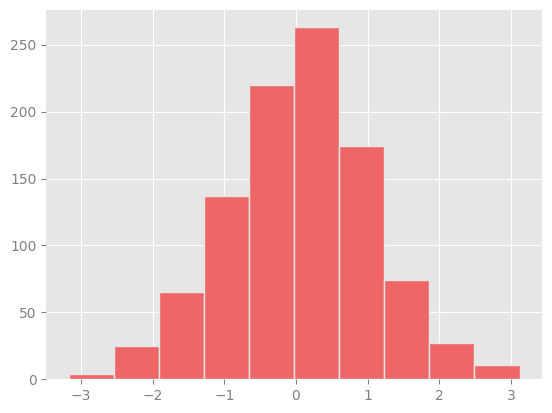

In [35]:
# works once
plt.style.use('default')
x = np.random.randn(1000)

ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

plt.grid(color='w', linestyle='solid')

# hides frame
for spine in ax.spines.values():
    spine.set_visible(False)

# hides ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')

ax.hist(x, edgecolor='#E6E6E6', color='#EE6666')

(array([  4.,  25.,  65., 137., 220., 263., 174.,  74.,  27.,  11.]),
 array([-3.17168007, -2.54251913, -1.9133582 , -1.28419727, -0.65503634,
        -0.0258754 ,  0.60328553,  1.23244646,  1.86160739,  2.49076833,
         3.11992926]),
 <BarContainer object of 10 artists>)

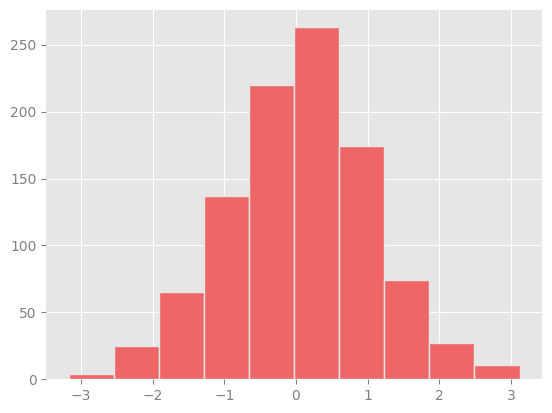

In [36]:
IPython_default = plt.rcParams.copy()

from matplotlib import cycler

patch = {'edgecolor': '#E6E6E6', 'force_edgecolor': True}
colors = cycler('color', ['#EE6666', '#3388BB', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', **patch)
plt.rc('lines', linewidth=2)
#or
# plt.rcParams.update(**kwargs)
# plt.rcParams['property'] = value
# print(plt.rcParams)

plt.hist(x)

### 12 3D

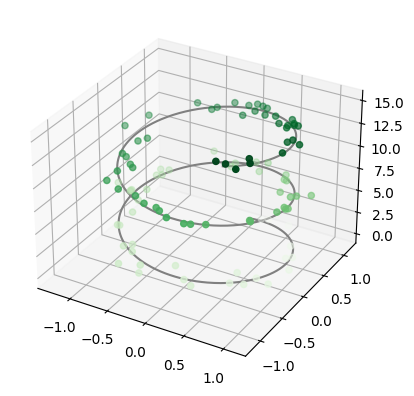

In [37]:
plt.style.use('default')
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

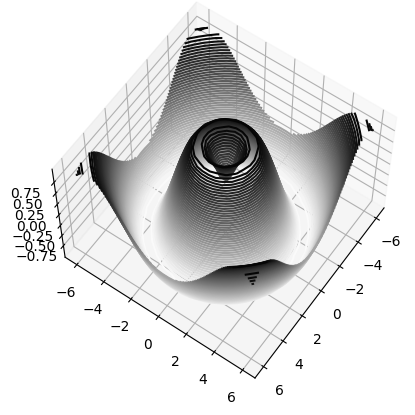

In [38]:
f = lambda x, y: np.sin(np.sqrt(x ** 2 + y ** 2))
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.view_init(60, 35)

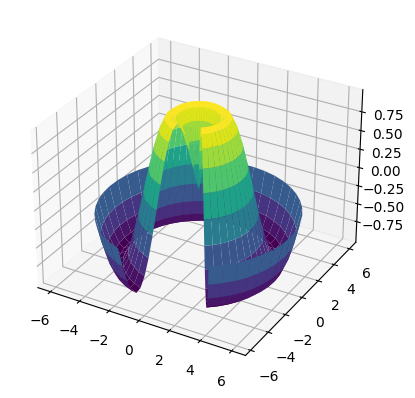

In [39]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)
X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

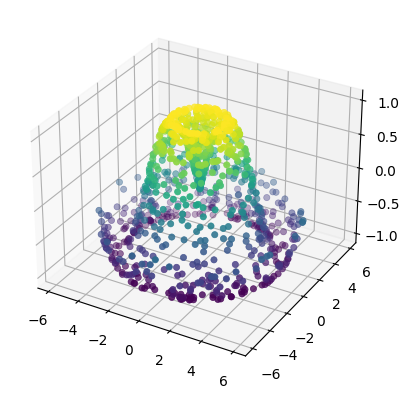

In [40]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)

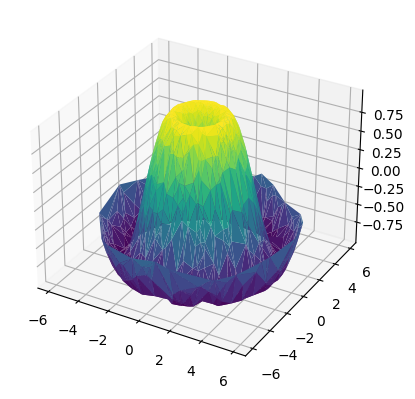

In [41]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')